In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Data Science YT\datasets\homeprices2.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# Dummies

In [3]:
dummies=pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
merged=pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
final=merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [7]:
x=final.drop('price',axis='columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [8]:
y=final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [9]:
model.fit(x,y)

LinearRegression()

In [10]:
model.predict([[2800,0,1]]) #price in robinsville

array([590775.63964739])

In [11]:
model.predict([[3400,0,0]]) #price in west winsdor

array([681241.66845839])

In [12]:
model.predict(x)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [13]:
model.score(x,y)

0.9573929037221871

# One Hot Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
dfle=df
dfle.town=le.fit_transform(df.town)
dfle.town

0     0
1     0
2     0
3     0
4     0
5     2
6     2
7     2
8     2
9     1
10    1
11    1
12    1
Name: town, dtype: int32

In [17]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [18]:
x=dfle[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [19]:
y=dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [22]:
x = ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [23]:
x=x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [24]:
model.fit(x, y) #train

LinearRegression()

In [25]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [26]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

In [27]:
model.predict(x)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781552, 579723.71533004, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.1513653 , 603465.38378843, 628844.87207052,
       692293.59277574])

In [29]:
model.score(x,y)

0.9573929037221874

In [31]:
df_pred=df

In [34]:
df_pred['Predicted Price']=model.predict(x)
df_pred

,town,area,price,Predicted Price
0,0,2600,550000,539709.739841
1,0,3000,565000,590468.716405
2,0,3200,610000,615848.204687
3,0,3600,680000,666607.181251
4,0,4000,725000,717366.157816
5,2,2600,585000,579723.715330
6,2,2800,615000,605103.203612
7,2,3300,650000,668551.924317
8,2,3600,710000,706621.156740
9,1,2600,575000,565396.151365


# Exercise


This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [45]:
ds=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Data Science YT\datasets\carprice.csv")
ds

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

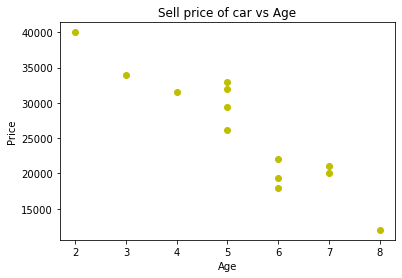

In [47]:
plt.title('Sell price of car vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.scatter(ds['Age(yrs)'],ds['Sell Price($)'],color='y')
plt.show()

In [48]:
dummies=pd.get_dummies(ds['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [49]:
merged=pd.concat([ds,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [50]:
final=merged.drop(['Car Model'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [52]:
x=final.drop(['Sell Price($)','Audi A5'],axis='columns')
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [53]:
y=final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [55]:
model.fit(x,y)

LinearRegression()

In [56]:
model.predict([[45000,4,0,1]]) #price of a mercedez benz that is 4 yr old with mileage 45000

array([36991.31721061])

In [57]:
model.predict([[86000,7,1,0]]) # price of a BMW X5 that is 7 yr old with mileage 86000

array([11080.74313219])

In [58]:
model.predict(x)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [60]:
model.score(x,y)

0.9417050937281082

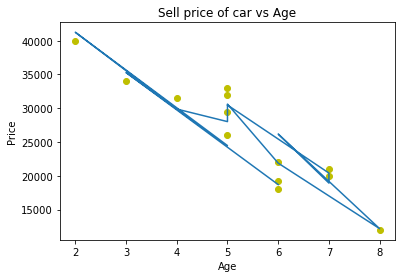

In [62]:
plt.title('Sell price of car vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.plot(ds['Age(yrs)'],model.predict(x))
plt.scatter(ds['Age(yrs)'],ds['Sell Price($)'],color='y')
plt.show()

In [63]:
pred_price=ds
pred_price

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [64]:
pred_price['Predicted Price']=model.predict(x)
pred_price

,Car Model,Mileage,Sell Price($),Age(yrs),Predicted Price
0,BMW X5,69000,18000,6,18705.272364
1,BMW X5,35000,34000,3,35286.784456
2,BMW X5,57000,26100,5,24479.191125
3,BMW X5,22500,40000,2,41245.764264
4,BMW X5,46000,31500,4,29882.987791
5,Audi A5,59000,29400,5,28023.613524
6,Audi A5,52000,32000,5,30614.468185
7,Audi A5,72000,19300,6,21879.572670
8,Audi A5,91000,12000,8,12182.345621
9,Mercedez Benz C class,67000,22000,6,26183.723879
